In [19]:
import pandas 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVR

In [20]:
df = pandas.read_csv('../datasets/lluvia2022.csv', encoding='ISO-8859-1')
df.head()

,LON,LAT,EDO,CLAVE,ESTACION,ene-22
0,-102.309722,21.895000,AGS,AGSAG,"Aguascalientes, Ags.",1.50
1,-102.585833,22.177222,AGS,ALMAG,"Alamitos, Ags.",5.50
2,-102.184167,21.738611,AGS,BRTAG,"San Bartolo, Ags.",0.00
3,-102.712222,21.849167,AGS,CALVILLO,"Calvillo, Ags. SMN*",1.75
4,-102.676944,21.997500,AGS,CDRAG,"La Codorniz, Ags.",0.00


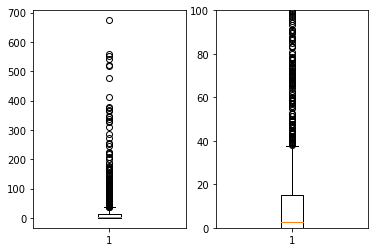

In [21]:
plt.figure()
plt.subplot(1,2,1)
plt.boxplot(df.values[:,-1])
plt.subplot(1,2,2)
plt.boxplot(df.values[:,-1])
plt.ylim([0,100])
plt.show()

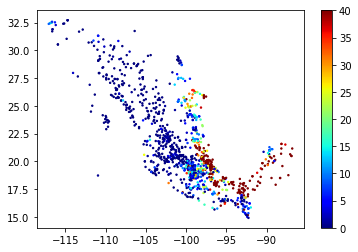

In [22]:
plt.figure()
plt.scatter(df['LON'].values, df['LAT'].values, s = 2, c = df.values[:, -1], vmin = 0, vmax = 40, cmap = 'jet')
plt.colorbar()
plt.show()

In [23]:
Xtrain = df[['LON','LAT']].values
Ytrain = df.values[:,-1]
print('Xtrain', Xtrain.shape, 'Ytrain', len(Ytrain))

model = SVR()
model.fit(Xtrain,Ytrain)

Xtrain (1252, 2) Ytrain 1252


SVR()

In [24]:
minx,miny = np.min(Xtrain,axis=0)
maxx,maxy = np.max(Xtrain,axis=0)

N = 100
rowx = np.linspace(minx, maxx, N)
rowy = np.linspace(miny, maxy, N)
xx, yy = np.meshgrid(rowx, rowy)
zz = np.zeros((N, N), float)
color = np.zeros((N,N,4))

norm = matplotlib.colors.Normalize(vmin=0, vmax=40)
for x in range(N):
    for y in range(N):
        vec = np.array([[ xx[x, y], yy[x, y] ]])
        zz[x,y] = model.predict(vec)
        c = list(matplotlib.cm.jet(norm(zz[x, y])))
        color[N-1 - x, y, :] = c #cambia el orgien con N-1-x
color = (color * 255).astype(int)

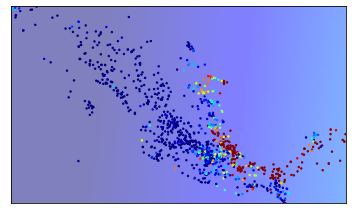

In [25]:
plt.figure()
plt.scatter(df['LON'].values,df['LAT'].values,s=2,c=df.values[:,-1],vmin=0,vmax=40,cmap='jet')
plt.imshow(color,extent=(minx,maxx,miny,maxy),alpha=0.5)
plt.xticks([])
plt.yticks([])
plt.xlim([minx, maxx])
plt.ylim([miny, maxy])
plt.show()

## Landmarks

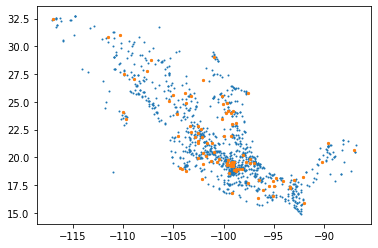

In [29]:
#landmarks = distancia de un punto al landmark
nL = 100
n = len(Xtrain)

idx = np.random.permutation(n)[:nL]
XL = Xtrain[idx,:]

plt.figure()
plt.scatter(Xtrain[:,0],Xtrain[:,1],s=1)
plt.scatter(XL[:,0], XL[:,1],s=5)
plt.show()

In [37]:
XLtrain = np.zeros((n,nL))
for i in range(n):
    for j in range(nL):
        XLtrain[i,j] = np.linalg.norm(( Xtrain[i,:]-XL[j,:] ))
print('Xtr', Xtrain.shape)
print('XLtr', XLtrain.shape)

Xtr (1252, 2)
XLtr (1252, 100)


In [42]:
model = SVR(kernel='linear')
model.fit(XLtrain,Ytrain)

SVR(kernel='linear')

In [43]:
minx,miny = np.min(Xtrain,axis=0)
maxx,maxy = np.max(Xtrain,axis=0)

N = 100
rowx = np.linspace(minx, maxx, N)
rowy = np.linspace(miny, maxy, N)
xx, yy = np.meshgrid(rowx, rowy)
zz = np.zeros((N, N), float)
color = np.zeros((N,N,4))

norm = matplotlib.colors.Normalize(vmin=0, vmax=40)
for x in range(N):
    for y in range(N):
        vec = np.array([[ xx[x, y], yy[x, y] ]])
        vecL = np.zeros((1, nL))
        for j in range(nL):
            vecL[0, j] = np.linalg.norm((vec - XL[j, :]))
        zz[x,y] = model.predict(vecL)
        c = list(matplotlib.cm.jet(norm(zz[x, y])))
        color[N-1 - x, y, :] = c
color = (color * 255).astype(int)

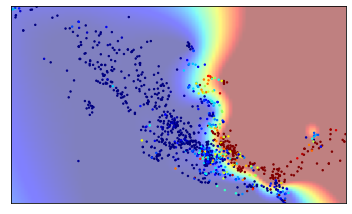

In [44]:
plt.figure()
plt.scatter(df['LON'].values,df['LAT'].values,s=2,c=df.values[:,-1],vmin=0,vmax=40,cmap='jet')
plt.imshow(color,extent=(minx,maxx,miny,maxy),alpha=0.5)
plt.xticks([])
plt.yticks([])
plt.xlim([minx, maxx])
plt.ylim([miny, maxy])
plt.show()